The goal of this post is to answer the following questions related to rolling two 20-sided dice:

* Case 1 (Advantage): If I roll two 20-sided dice and take the greater of the two results, how much higher is the expected value than if I had simply rolled one 20-sided die?
* Case 2 (Disadvantage): If I roll two 20-sided dice and take the lesser of the two results, how much smaller is the expected value than if I had simply rolled one 20-sided die?

### Visual Solution
Starting data analysis with visualization is always a good choice, as it might reveal features of the dataset which aren't immediately obvious from the problem description. To get an intuitive feel of what's happening behind the scenes, we can visualize every possible result of the two dice throws by plotting the result of the first dice roll on the x-axis and the result of the second dice roll on the y-axis. 

The following code will plot Case 1, the maximum of two 20-sided dice (advantage), for all possible combinations:

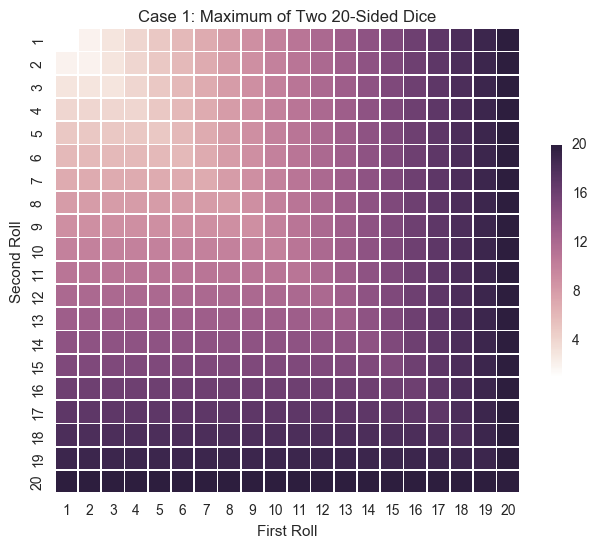

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
#Remember that Python is zero-indexed, and the range function will return 
#up to one value less than the second parameter
roll1poss = list(range(1,21))
roll2poss = list(range(1,21))
#This next line might look scary, but we are finding the maximum of (each 
#first roll out of all possible first rolls) and (each second roll out of 
#all possible second rolls), using a listcomp
maxRoll = [max(roll1,roll2) for roll1 in roll1poss for roll2 in roll2poss]
#Now, we want to reshape the array so that it is 20x20 instead of 1x400
maxRollReshape = np.reshape(maxRoll,[20,20])
#Finally, let's plot the results. I wrote it as a function so it can be
#re-used for Case 2, as well
def plotHeatmap(rollResults, titleLab):
    f, ax = plt.subplots(figsize=(8, 6))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sns.heatmap(rollResults, cmap=cmap, vmax=20, square=True, 
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,
                xticklabels=roll1poss,yticklabels=roll2poss);
    ax.set_xlabel('First Roll')
    ax.set_ylabel('Second Roll')
    ax.set_title(titleLab)
plotHeatmap(maxRollReshape,'Case 1: Maximum of Two 20-Sided Dice');

Notice that the graph is much darker (high numbers) on the bottom and right edges. Even if the first roll is a 1, as long as the second roll is 20, then the maximum will be 20, so we should expect to see a heavier concentration of darker colors in this figure compared to the second case. 

The same process can be repeated for Case 2, the minimum of two 20-sided dice (disadvantage), for all possible combinations:

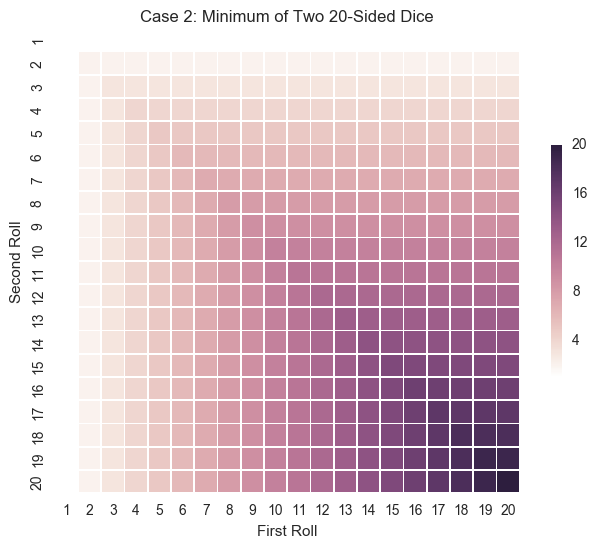

In [2]:
#Using the same reasoning as in the previous code
minRoll = [min(roll1,roll2) for roll1 in roll1poss for roll2 in roll2poss]
minRollReshape = np.reshape(minRoll,[20,20])
plotHeatmap(minRollReshape,'Case 2: Minimum of Two 20-Sided Dice');

In this figure, the opposite effect occurred- we see lighter colors on the left and upper edges, and the concentration of colors is much lighter compared to Case 1. 

This problem can actually be solved very simply by adding up all the possible results and dividing by the total number of states, like so:

In [3]:
#Sum all the possible results, then divide by the number of elements
maxExpect = sum(maxRoll)/len(maxRoll)
minExpect = sum(minRoll)/len(minRoll)
normExpect = sum(roll1poss)/len(roll1poss)
stdExpect = np.std(roll1poss)
print("The expected value of Case 1 (Advantage) is:",maxExpect)
print("The expected value of Case 2 (Disadvantage) is:",minExpect)
print("The expected value of a normal 20-sided dice is:",normExpect)

The expected value of Case 1 (Advantage) is: 13.825
The expected value of Case 2 (Disadvantage) is: 7.175
The expected value of a normal 20-sided dice is: 10.5


Hence, Case 1 (Advantage) is effectively adding 3.325 to a normal 20-sided dice roll, while Case 2 (Disadvantage) is effectively subtracting 3.325.

However, there is an added benefit to rolling under advantage (Case 1) and a detriment to rolling under disadvantage (Case 2), as the standard deviation will be different for these two distributions, compared to a normal dice roll. You can think of the standard deviation as the "consistency" of the dice roll. As the standard deviation decreases, the dice will tend to roll more consistently high (Case 1) or low (Case 2).

This can be visualized by looking at the histograms of possible values for each case:

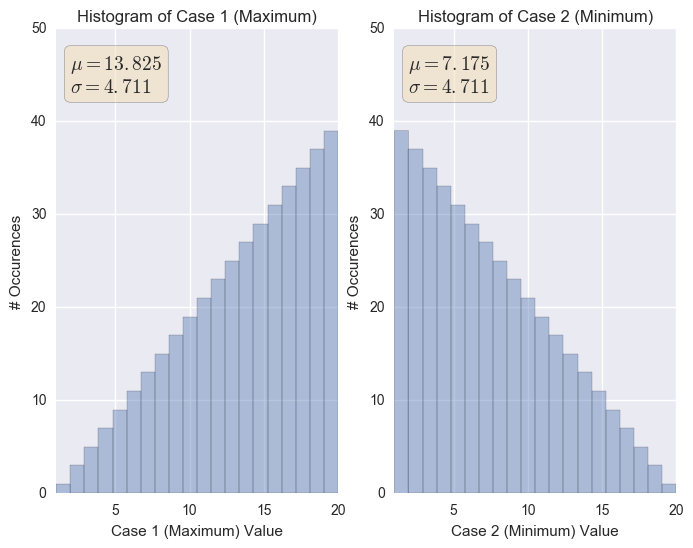

In [27]:
#Set up a side-by-side plot with two axes
f,((ax1,ax2)) = plt.subplots(1,2,figsize=(8,6)) 
#Define this as a function so I don't have to repeat myself for both plots
def plotHistogram(curAx, listVal, titleLab, scaling):
    curAx.axis([1,20,0,scaling])
    values = np.array(listVal)
    sns.distplot(values,ax=curAx, kde=False, bins=20) 
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textStr = '$\mu=%.3f$\n$\sigma=%.3f$' % (values.mean(), values.std())
    curAx.text(0.05, 0.95, textStr, transform=curAx.transAxes, fontsize=14,
               verticalalignment='top', bbox=props)
    curAx.set_title('Histogram of {}'.format(titleLab))
    curAx.set_ylabel('# Occurences')
    curAx.set_xlabel('{} Value'.format(titleLab))    
plotHistogram(ax1, maxRoll, 'Case 1 (Maximum)',50)
plotHistogram(ax2, minRoll, 'Case 2 (Minimum)',50)

For comparison, the standard deviation of a normal 20-sided dice roll is 5.77, so the difference in standard deviation is significant.

### Statistical Solution
Next, let's try to reason out this problem using statistics. Take a look at the histograms above. For the maximum of two 20-sided dice (Case 1), the number of occurrences for each value has a pattern:

1, 3, 5, 7, 9, 11, ... , 39

This pattern could also be described as the following, with k equal to the result:

2(k-1)+1

To find the expected value, we want to sum up all the values that the dice roll could take (k = 1 to 20) and divide by the total number of possibilities (400):

$E[K]=\frac{1}{400}\sum_{k=1}^{20} (2(k-1)+1)k=\frac{1}{400}\sum_{k=1}^{20} 2k^{2}-k=\frac{5530}{400} = 13.825$

In other words, we get exactly the same solution as before.

Similarly, the minimum of two 20-sided dice (Case 2) has the opposite pattern:

39, 37, 35, 33, 31, 29, ... , 1

This pattern could be described as:

2(20-k)+1

Again, we sum up all the values that the dice roll could take (k = 1 to 20) and divide by the total number of possibilities (400). Unsurprisingly, we get the same result as from the visual solution above, since they are equivalent:

$E[K]=\frac{1}{400}\sum_{k=1}^{20} (2(20-k)+1)k=\frac{1}{400}\sum_{k=1}^{20} -2k^{2}+41k=\frac{2870}{400} = 7.175$

This solution generalizes very well for an n-sided dice. The maximum of two n-sided dice will be:

$\frac{1}{n^{2}} \sum_{k=1}^{n}(2k^{2}-k)$

While the minimum of two n-sided dice will be:

$\frac{1}{n^{2}} \sum_{k=1}^{n}(-2k^{2}+(2n+1)k)$

### Monte Carlo
The final way we will solve this problem is by sampling the distributions using a Monte Carlo method. Monte Carlo methods use repeated random simulation (sampling) of a distribution to achieve an approximate result. In layman's terms, we're going to actually roll the two dice, repeat this process one million (or more) times, and then we'll look at the results.

Monte Carlo methods are so attractive because in the simplest cases, they do not require much thought. If you know how to program, and you can describe the situation logically, you can write a Monte Carlo algorithm. However, my doctorate in nuclear engineering, for which Monte Carlo methods are very common, compels me to mention the **huge** caveat that Monte Carlo methods can become extremely complex in many practical situations, requiring variance reduction methods and other messy techniques.

First, let's try it for Case 1 (Advantage):

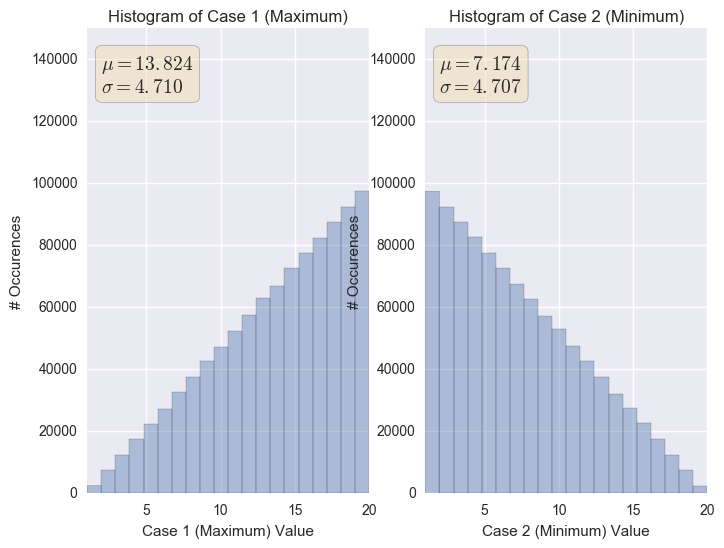

In [32]:
from random import randint
#The numHist variable specifies how many times we will be rolling 
#the dice. More is better, but slower.
numHist = 1000000
#Case 1- Maximum of 2 dice rolls
resultListMax = []
for ii in range(numHist):
    roll1 = randint(1,20)
    roll2 = randint(1,20)
    resultListMax.append(max(roll1,roll2))
#Case 2- Minimium of 2 dice rolls
resultListMin = []
for ii in range(numHist):
    roll1 = randint(1,20)
    roll2 = randint(1,20)
    resultListMin.append(min(roll1,roll2))
#Visualize the results
f,((ax1,ax2)) = plt.subplots(1,2,figsize=(8,6)) 
plotHistogram(ax1, resultListMax, 'Case 1 (Maximum)',150000)
plotHistogram(ax2, resultListMin, 'Case 2 (Minimum)',150000)

Compare these results to the previous histograms. We get a similar final answer, but it's not exactly the same. In general, simulating more histories will improve the results, but Monte Carlo will only ever approximate the "true" answer. 

So why use Monte Carlo at all? First, especially for simple, "toy" cases, it's quick to code and requires very little thought. Second, there are many problems that are very difficult, or even impossible, to solve analytically (this is why Monte Carlo is very popular in nuclear engineering). Monte Carlo can give you an approximate solution when all other methods may fail.